## Importing Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Helper Functions

In [3]:
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = (data[column] < lower_limit) | (data[column] > upper_limit)
    return outliers

## -------------------------------------------------------------------------------------------------------

## Reading the CSV File

In [9]:
data = pd.read_csv("first inten project.csv")
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [10]:
len(data)

36285

## -------------------------------------------------------------------------------------------------------

### Checking "number of adults" Feature

In [11]:
column = "number of adults"

In [12]:
data[column].describe()

count    36285.000000
mean         1.844839
std          0.518813
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: number of adults, dtype: float64

In [13]:
data[column].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [14]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of adults'>

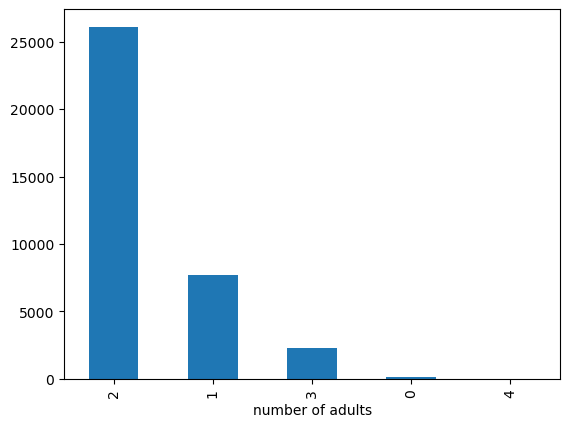

In [15]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of children" Feature

In [16]:
column = "number of children"

In [17]:
data[column].describe()

count    36285.000000
mean         0.105360
std          0.402704
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: number of children, dtype: float64

In [18]:
data[column].value_counts()

number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [19]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of children'>

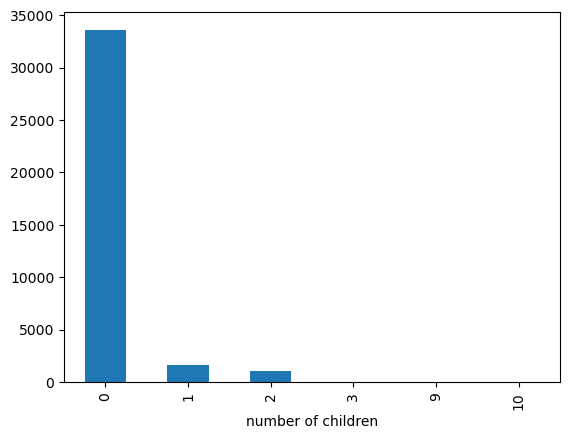

In [20]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of weekend nights" Feature

In [21]:
column = "number of weekend nights"

In [22]:
data[column].describe()

count    36285.000000
mean         0.810693
std          0.870590
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: number of weekend nights, dtype: float64

In [23]:
data[column].value_counts()

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [24]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of weekend nights'>

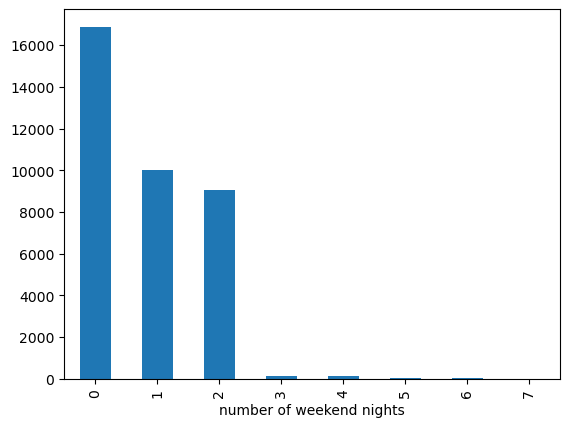

In [25]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of week nights" Feature

In [26]:
column = "number of week nights"

In [27]:
data[column].describe()

count    36285.000000
mean         2.204602
std          1.410946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: number of week nights, dtype: float64

In [28]:
data[column].value_counts()

number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [29]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of week nights'>

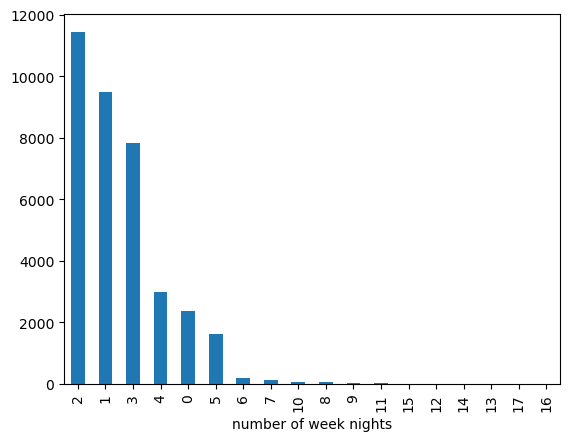

In [30]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "type of meal" Feature

In [31]:
column = "type of meal"

In [32]:
data[column].describe()

count           36285
unique              4
top       Meal Plan 1
freq            27842
Name: type of meal, dtype: object

In [33]:
data[column].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [34]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='type of meal'>

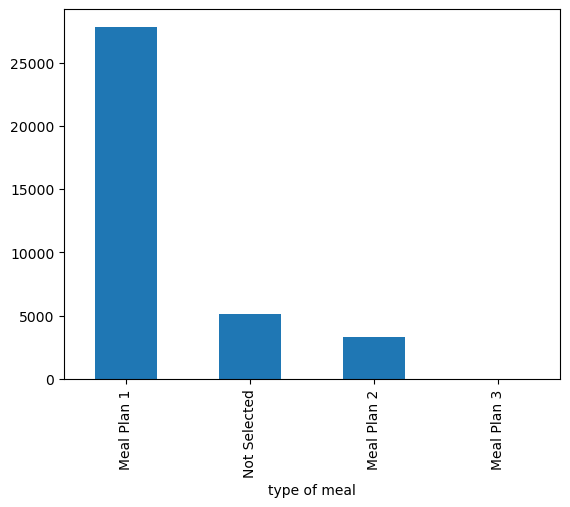

In [35]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [36]:
# Not Selected ...> 0
# Meal Plan 1  ...> 1
# Meal Plan 2  ...> 2
# Meal Plan 3  ...> 3

In [37]:
data[column] = data[column].replace("Not Selected", 0)
data[column] = data[column].replace("Meal Plan 1", 1)
data[column] = data[column].replace("Meal Plan 2", 2)
data[column] = data[column].replace("Meal Plan 3", 3)

In [38]:
data[column].value_counts()

type of meal
1    27842
0     5132
2     3306
3        5
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "car parking space" Feature

In [39]:
column = "car parking space"

In [40]:
data[column].describe()

count    36285.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: car parking space, dtype: float64

In [41]:
data[column].value_counts()

car parking space
0    35161
1     1124
Name: count, dtype: int64

In [42]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='car parking space'>

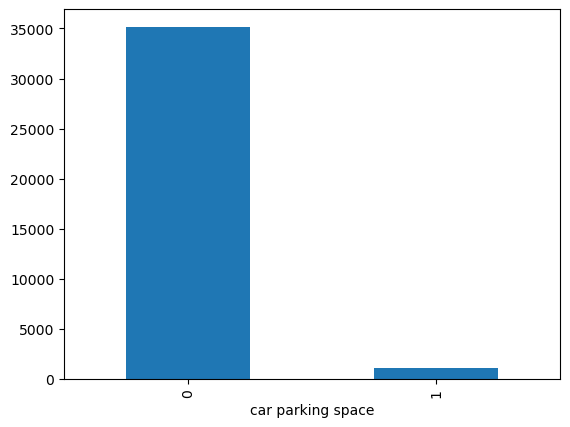

In [43]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "room type" Feature

In [44]:
column = "room type"

In [45]:
data[column].describe()

count           36285
unique              7
top       Room_Type 1
freq            28138
Name: room type, dtype: object

In [46]:
data[column].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [47]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='room type'>

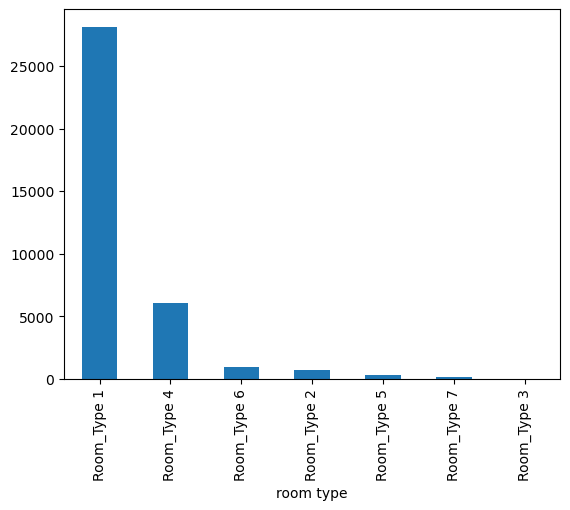

In [48]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [49]:
# Room_Type 1  ...> 0
# Room_Type 2  ...> 1
# Room_Type 3  ...> 2
# Room_Type 4  ...> 3
# Room_Type 5  ...> 4
# Room_Type 6  ...> 5
# Room_Type 7  ...> 6

In [50]:
data[column] = data[column].replace("Room_Type 1", 0)
data[column] = data[column].replace("Room_Type 2", 1)
data[column] = data[column].replace("Room_Type 3", 2)
data[column] = data[column].replace("Room_Type 4", 3)
data[column] = data[column].replace("Room_Type 5", 4)
data[column] = data[column].replace("Room_Type 6", 5)
data[column] = data[column].replace("Room_Type 7", 6)

In [51]:
data[column].value_counts()

room type
0    28138
3     6059
5      966
1      692
4      265
6      158
2        7
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "lead time" Feature

In [52]:
column = "lead time"

In [53]:
data[column].describe()

count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead time, dtype: float64

In [54]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='lead time', ylabel='Count'>

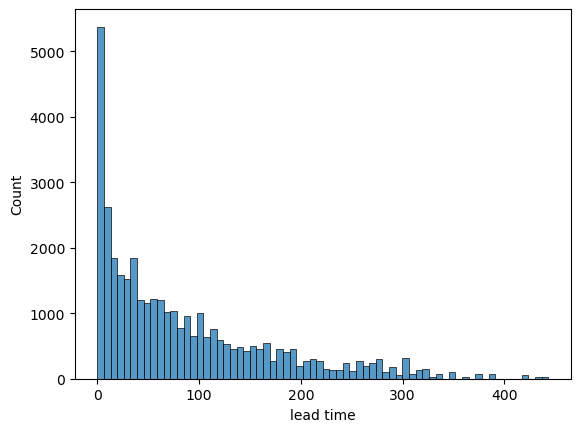

In [55]:
sns.histplot(data[column], kde=False)

<Axes: >

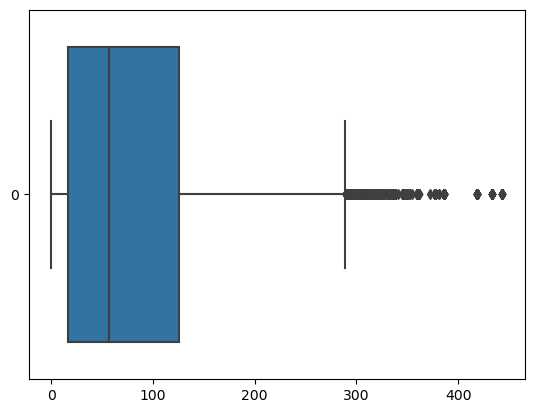

In [56]:
sns.boxplot(data[column], orient="h")

In [57]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1332


- I will not remove/replace the outliers because higher values for lead time may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "market segment type" Feature

In [58]:
column = "market segment type"

In [59]:
data[column].describe()

count      36285
unique         5
top       Online
freq       23221
Name: market segment type, dtype: object

In [60]:
data[column].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [61]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='market segment type'>

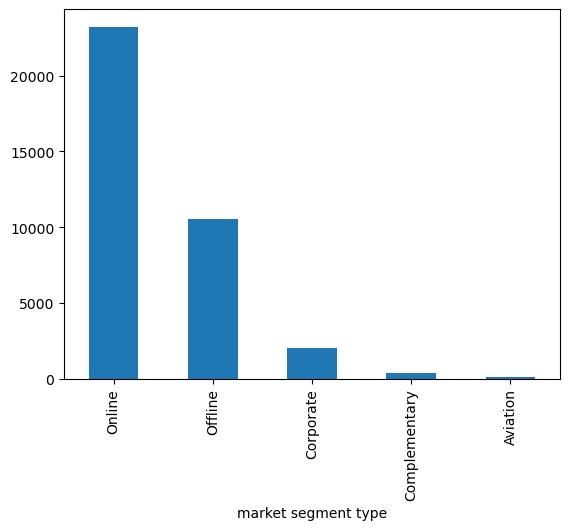

In [62]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [63]:
# Online         ...> 0
# Offline        ...> 1
# Corporate      ...> 2
# Complementary  ...> 3
# Aviation       ...> 4

In [64]:
data[column] = data[column].replace("Online", 0)
data[column] = data[column].replace("Offline", 1)
data[column] = data[column].replace("Corporate", 2)
data[column] = data[column].replace("Complementary", 3)
data[column] = data[column].replace("Aviation", 4)

In [65]:
data[column].value_counts()

market segment type
0    23221
1    10531
2     2017
3      391
4      125
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "repeated" Feature

In [66]:
column = "repeated"

In [67]:
data[column].describe()

count    36285.000000
mean         0.025630
std          0.158032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated, dtype: float64

In [68]:
data[column].value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

In [69]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='repeated'>

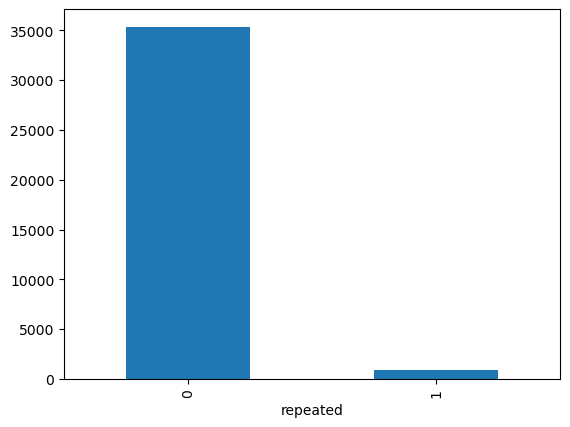

In [70]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-C" Feature

In [71]:
column = "P-C"

In [72]:
data[column].describe()

count    36285.000000
mean         0.023343
std          0.368281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: P-C, dtype: float64

In [73]:
data[column].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [74]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='P-C'>

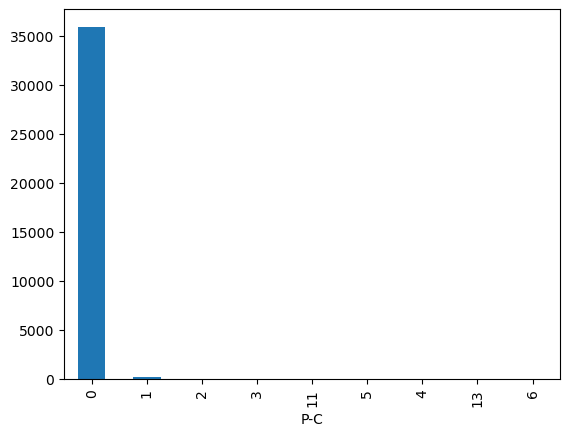

In [75]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-not-C" Feature

In [76]:
column = "P-not-C"

In [77]:
data[column].describe()

count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: P-not-C, dtype: float64

In [78]:
data[column].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [79]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


In [80]:
#data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "average price" Feature

In [81]:
column = "average price "

In [82]:
data[column].describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average price , dtype: float64

In [83]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='average price ', ylabel='Count'>

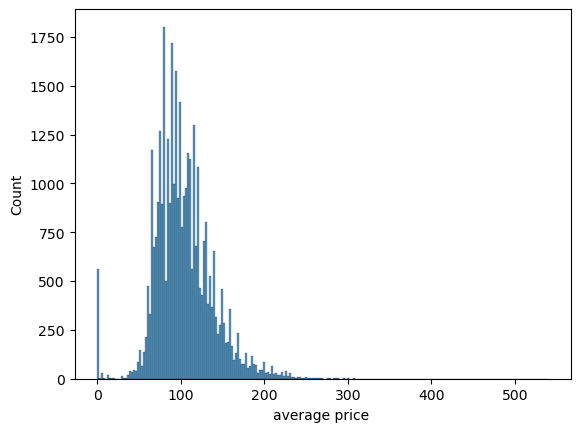

In [84]:
sns.histplot(data[column], kde=False)

<Axes: >

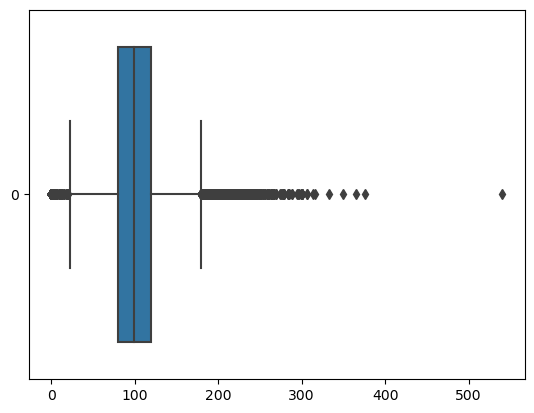

In [85]:
sns.boxplot(data[column], orient="h")

In [86]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1696


- I will not remove/replace the outliers because higher values for the average price may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "special requests" Feature

In [87]:
column = "special requests"

In [88]:
data[column].describe()

count    36285.000000
mean         0.619733
std          0.786262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: special requests, dtype: float64

In [89]:
data[column].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

In [90]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='special requests'>

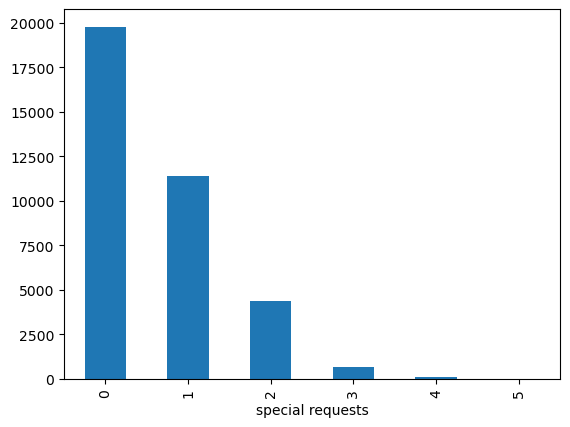

In [91]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "booking status" 

In [92]:
column = "booking status"

In [93]:
data[column].describe()

count            36285
unique               2
top       Not_Canceled
freq             24396
Name: booking status, dtype: object

In [94]:
data[column].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [95]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='booking status'>

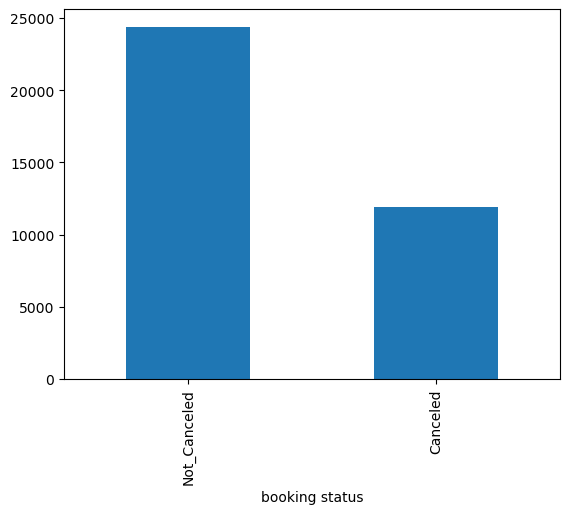

In [96]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [97]:
# Not_Canceled  ...> 0
# Canceled      ...> 1

In [98]:
data[column] = data[column].replace("Not_Canceled", 0)
data[column] = data[column].replace("Canceled", 1)

In [99]:
data[column].value_counts()

booking status
0    24396
1    11889
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

## Checking the relationship between Categorical Features and Average Price

- You may ignore this section

In [100]:
def plot(x, y):
    sns.stripplot(x=x, y=y, data=data, jitter=True)
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

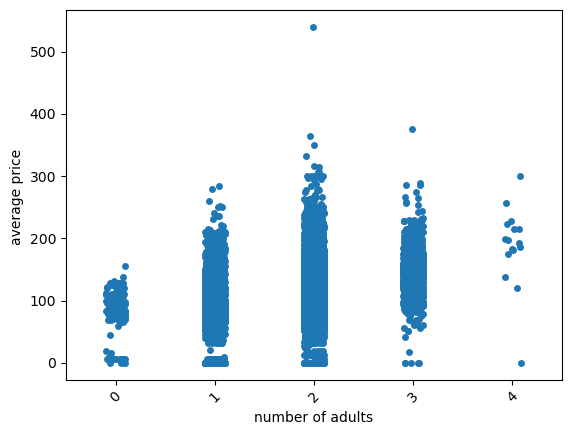

In [101]:
x = "number of adults"
y = "average price "
plot(x, y)

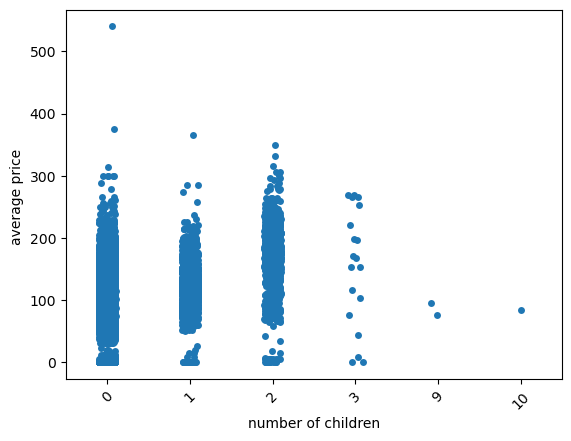

In [102]:
x = "number of children"
y = "average price "
plot(x, y)

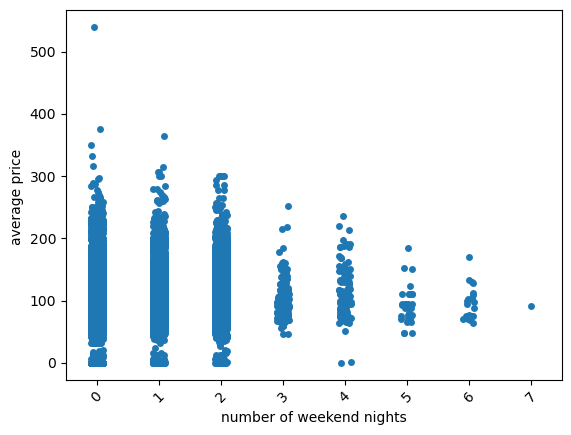

In [103]:
x = "number of weekend nights"
y = "average price "
plot(x, y)

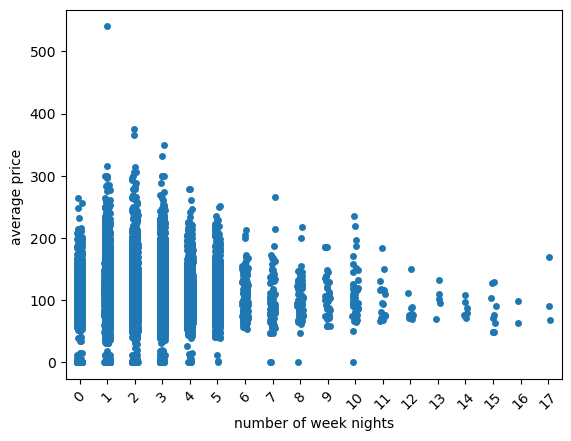

In [104]:
x = "number of week nights"
y = "average price "
plot(x, y)

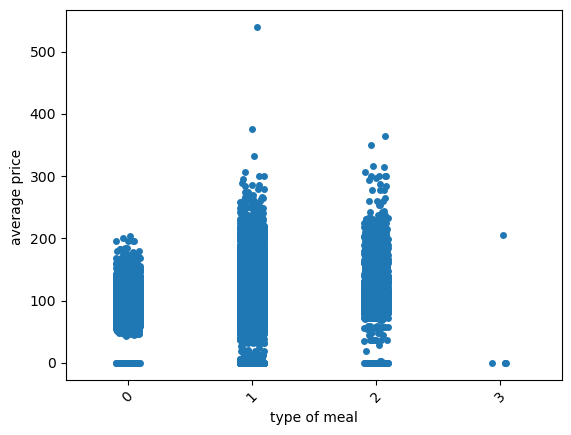

In [105]:
x = "type of meal"
y = "average price "
plot(x, y)

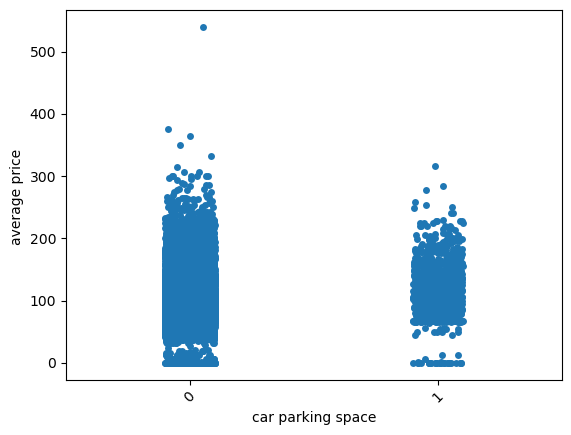

In [106]:
x = "car parking space"
y = "average price "
plot(x, y)

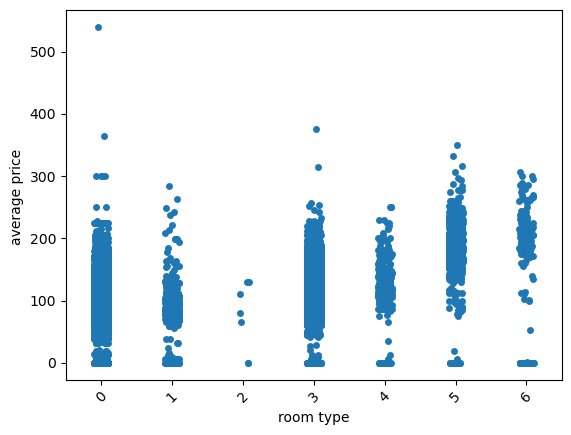

In [107]:
x = "room type"
y = "average price "
plot(x, y)

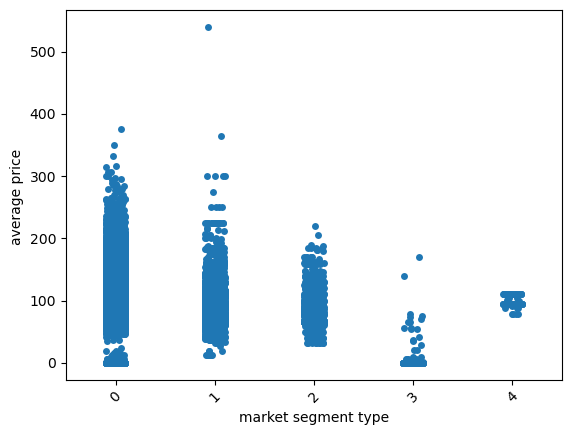

In [108]:
x = "market segment type"
y = "average price "
plot(x, y)

#### Comments
- The analysis suggests that average price does not exhibit a linear relationship with the individual categorical features examined. For instance, changes in the number of nights or the number of children do not appear to significantly affect the average price.
- Specifically, increasing the number of nights booked or the number of children does not show a corresponding change in the average price.
- I believe that average price may be influenced by a combination of features working together rather than any single feature individually. It is likely that the interplay between multiple variables contributes to variations in average price.

## -------------------------------------------------------------------------------------------------------

#### Combining the "number of week nights" and "number of weekend nights" into one Feature

In [109]:
data["total nights"] = data["number of week nights"] + data["number of weekend nights"]

#### Adding the Feature "month" and the Feature "day" from the "date of reservation"

In [110]:
data["date of reservation"] = pd.to_datetime(data["date of reservation"], format="%m/%d/%Y", errors="coerce")
data["month"] = data["date of reservation"].dt.month
data["day"] = data["date of reservation"].dt.day

In [111]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total nights,month,day
0,INN00001,1,1,2,5,1,0,0,224,1,0,0,0,88.00,0,2015-10-02,0,7,10.0,2.0
1,INN00002,1,0,1,3,0,0,0,5,0,0,0,0,106.68,1,2018-11-06,0,4,11.0,6.0
2,INN00003,2,1,1,3,1,0,0,1,0,0,0,0,50.00,0,2018-02-28,1,4,2.0,28.0
3,INN00004,1,0,0,2,1,0,0,211,0,0,0,0,100.00,1,2017-05-20,1,2,5.0,20.0
4,INN00005,1,0,1,2,0,0,0,48,0,0,0,0,77.00,0,2018-04-11,1,3,4.0,11.0


## -------------------------------------------------------------------------------------------------------

#### Dropping Unnecessary Features

In [112]:
data.drop(columns=["Booking_ID", "date of reservation", "number of weekend nights", "number of week nights"], inplace=True)

In [113]:
data.head()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day
0,1,1,1,0,0,224,1,0,0,0,88.00,0,0,7,10.0,2.0
1,1,0,0,0,0,5,0,0,0,0,106.68,1,0,4,11.0,6.0
2,2,1,1,0,0,1,0,0,0,0,50.00,0,1,4,2.0,28.0
3,1,0,1,0,0,211,0,0,0,0,100.00,1,1,2,5.0,20.0
4,1,0,0,0,0,48,0,0,0,0,77.00,0,1,3,4.0,11.0


# Data Analysis

In [115]:
# Variance
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
variance_values = numeric_cols.var()

# Skewness
skewness_values = numeric_cols.skew()

# Kurtosis
kurtosis_values = numeric_cols.kurtosis()

Stat_table = pd.DataFrame({'Column': variance_values.index, 
                           'Variance': variance_values.values,
                            'Skewness': skewness_values.values,
                            'Kurtosis': kurtosis_values.values})
                         
Stat_table

,Column,Variance,Skewness,Kurtosis
0,number of adults,0.269167,-0.332833,0.812610
1,number of children,0.162171,4.707675,36.947349
2,type of meal,0.230601,-0.130714,1.295385
3,car parking space,0.030018,5.414464,27.317925
4,room type,1.959442,1.729004,1.713485
5,lead time,7385.476617,1.292436,1.179155
6,market segment type,0.464428,1.684924,3.406882
7,repeated,0.024974,6.003783,34.047290
8,P-C,0.135631,25.203359,732.938601
9,P-not-C,3.076273,19.252855,457.506897


In [116]:
#Covariance matrix 
covar_matrix = numeric_cols.cov()
print("Covariance Matrix:\n", covar_matrix)

Covariance Matrix:
                      number of adults  number of children  type of meal  \
number of adults             0.269167           -0.004184     -0.001013   
number of children          -0.004184            0.162171      0.008167   
type of meal                -0.001013            0.008167      0.230601   
car parking space            0.001031            0.002386     -0.001261   
room type                    0.196447            0.205077      0.062791   
lead time                    4.325470           -1.628595      9.363068   
market segment type         -0.111027           -0.035824      0.083444   
repeated                    -0.015756           -0.002315      0.000759   
P-C                         -0.009056           -0.002432     -0.001202   
P-not-C                     -0.108382           -0.014974      0.005333   
average price                5.403332            4.768574      2.269527   
special requests             0.077227            0.039377     -0.034053   
booki

Correlation Matrix:
                      number of adults  number of children  type of meal  \
number of adults             1.000000           -0.020027     -0.004068   
number of children          -0.020027            1.000000      0.042233   
type of meal                -0.004068            0.042233      1.000000   
car parking space            0.011467            0.034198     -0.015154   
room type                    0.270501            0.363802      0.093411   
lead time                    0.097014           -0.047058      0.226881   
market segment type         -0.314021           -0.130536      0.254980   
repeated                    -0.192175           -0.036371      0.010003   
P-C                         -0.047395           -0.016398     -0.006796   
P-not-C                     -0.119106           -0.021201      0.006332   
average price                0.296832            0.337491      0.134699   
special requests             0.189317            0.124363     -0.090189   
book

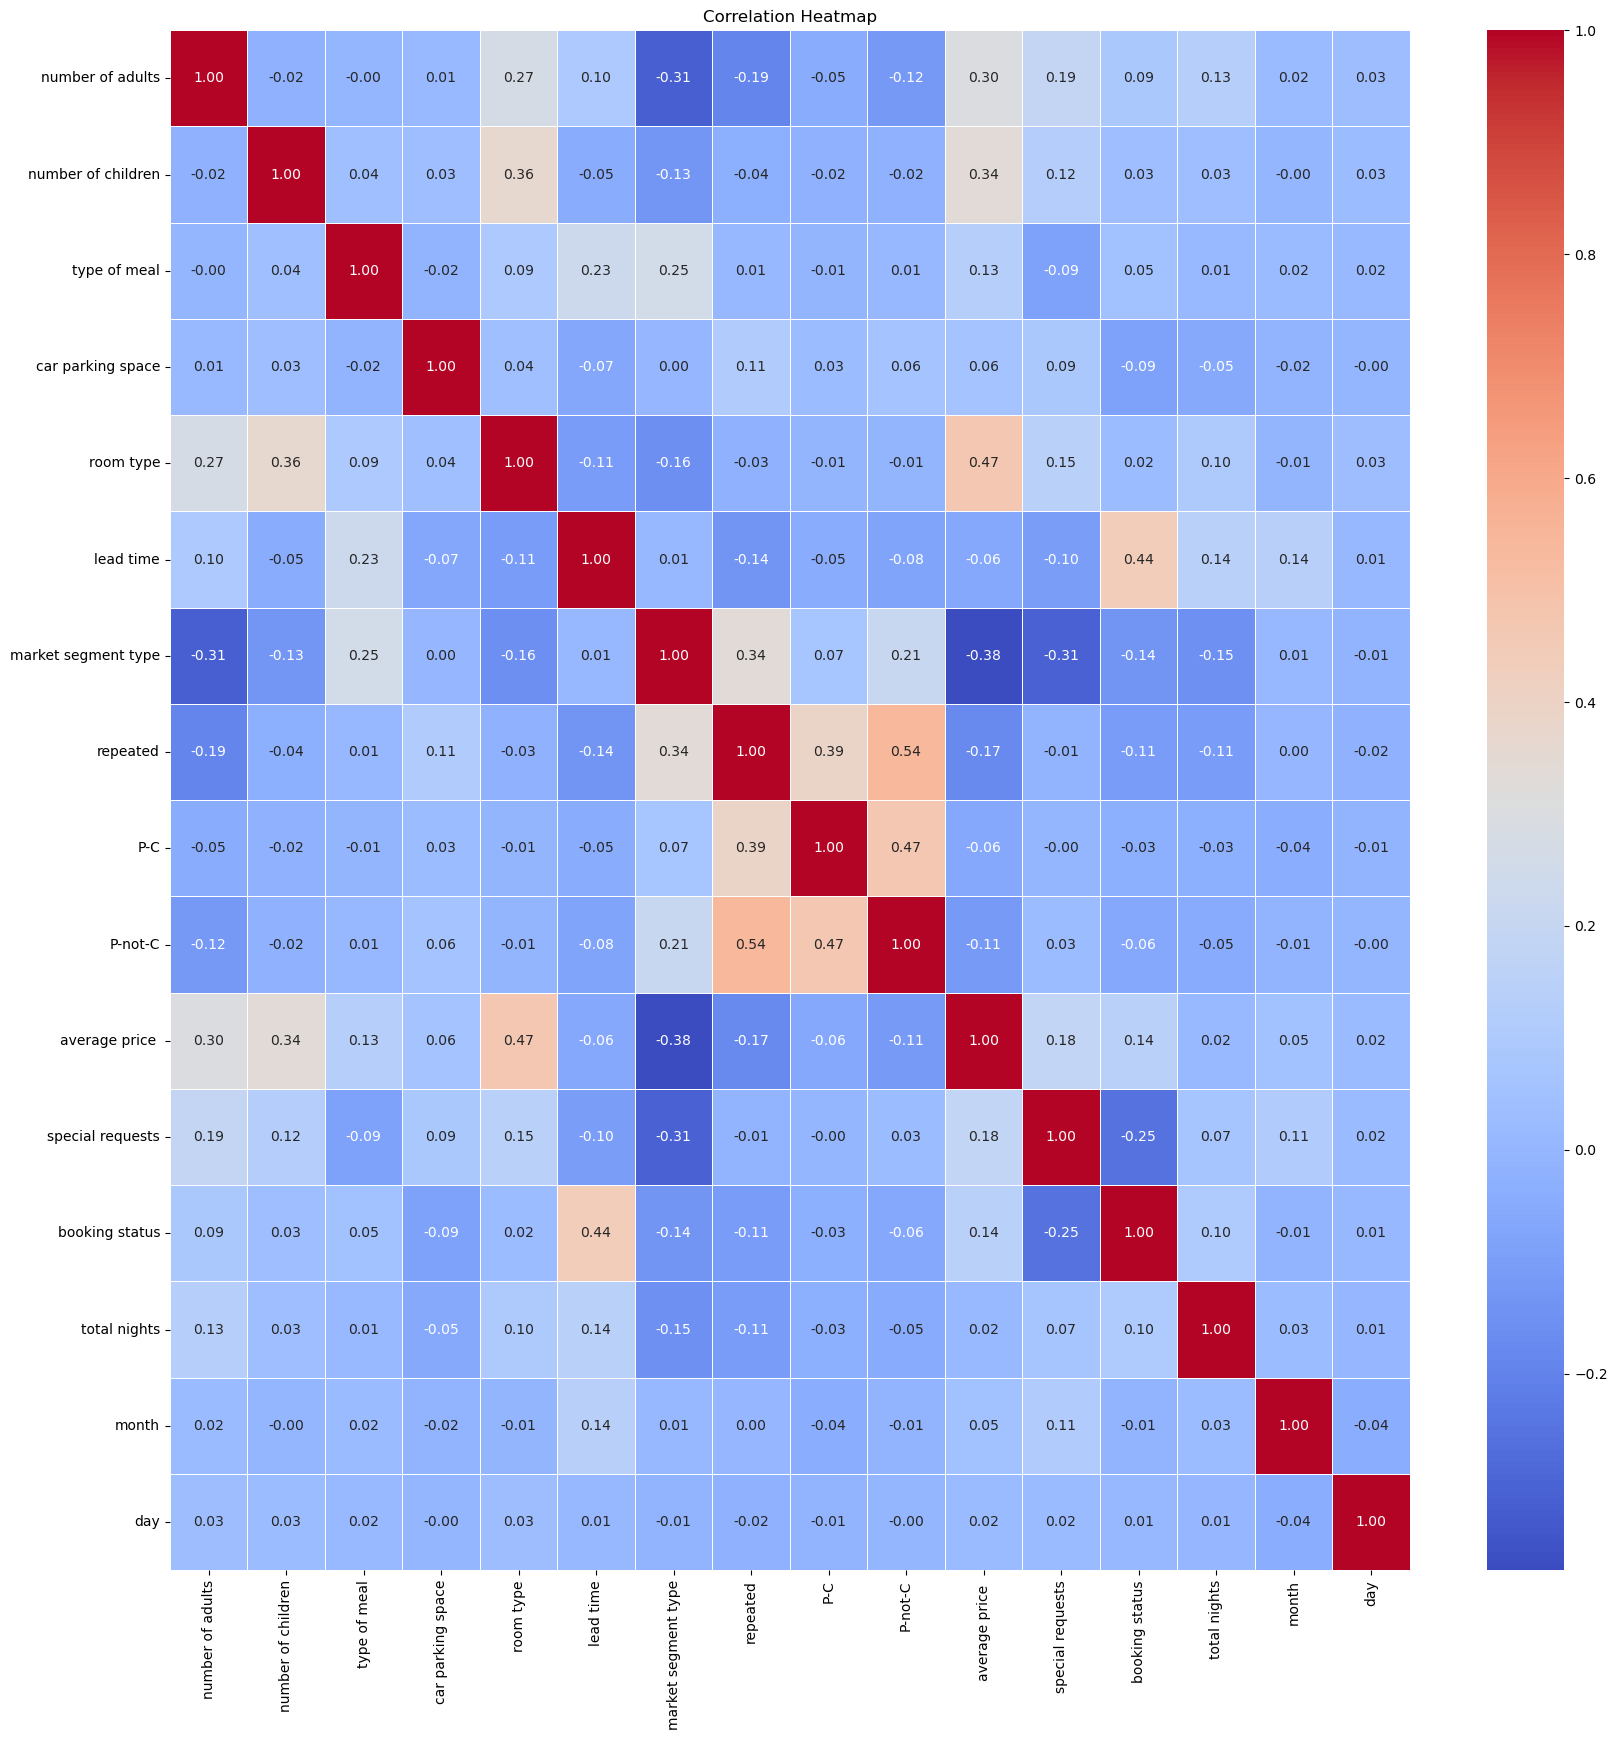

In [117]:
#correlation using heatmap
corr_matrix = numeric_cols.corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()